In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
df=pd.read_csv("Diabetes.csv")

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               99 non-null     int64  
 1   Glucose                   99 non-null     int64  
 2   BloodPressure             99 non-null     int64  
 3   SkinThickness             99 non-null     int64  
 4   Insulin                   99 non-null     int64  
 5   BMI                       99 non-null     float64
 6   DiabetesPedigreeFunction  99 non-null     float64
 7   Age                       99 non-null     int64  
 8   Outcome                   99 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 7.1 KB


In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [62]:
x=df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]

In [64]:
y=df["Outcome"]

In [66]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
94,2,142,82,18,64,24.7,0.761,21
95,6,144,72,27,228,33.9,0.255,40
96,2,92,62,28,0,31.6,0.130,24
97,1,71,48,18,76,20.4,0.323,22


In [68]:
y

0     1
1     0
2     1
3     0
4     1
     ..
94    0
95    0
96    0
97    0
98    0
Name: Outcome, Length: 99, dtype: int64

In [120]:
x_train, x_test ,y_train, y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [122]:
lr=LogisticRegression(max_iter=1000)

In [124]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [126]:
y_pred = lr.predict(x_test)

In [128]:
y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [130]:
accuracy=accuracy_score(y_test,y_pred)

In [132]:
accuracy

0.6333333333333333

In [135]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [137]:
conf_matrix

array([[13,  4],
       [ 7,  6]], dtype=int64)

In [139]:
class_report = classification_report(y_test, y_pred)

In [141]:
class_report

'              precision    recall  f1-score   support\n\n           0       0.65      0.76      0.70        17\n           1       0.60      0.46      0.52        13\n\n    accuracy                           0.63        30\n   macro avg       0.62      0.61      0.61        30\nweighted avg       0.63      0.63      0.62        30\n'

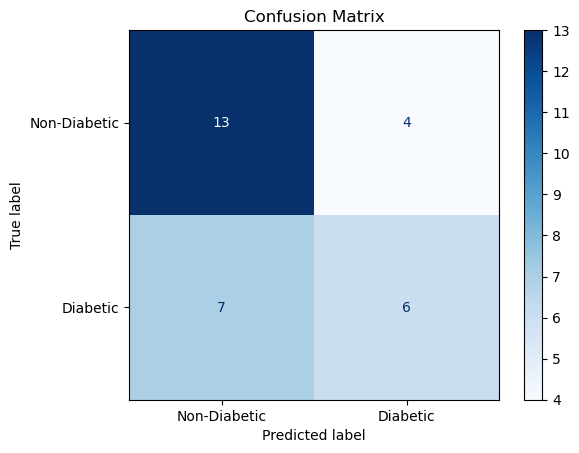

In [145]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, 
                              display_labels=["Non-Diabetic", "Diabetic"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()